# Import required libraries

In [2]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

# unpack the dataset

In [3]:
#load the dataset mnist into variable ojects which is composed of images of resolution 28 * 28 of handwritten digits
objects =  tf.keras.datasets.mnist 
# unpack and load the dataset
(training_images, training_labels), (test_images, test_labels) = objects.load_data()


The number of images used for training and testing

In [4]:
len(training_images )

60000

In [5]:
len(test_images)

10000

# Sample images used in training the model

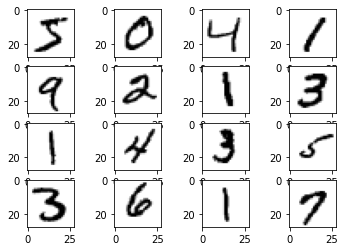

In [6]:
for i in range(16):
    plt.subplot(4,4, i + 1 )
    plt.imshow(training_images[i], cmap = plt.cm.binary)


In [9]:
print(training_images.shape)
print(training_images[0])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

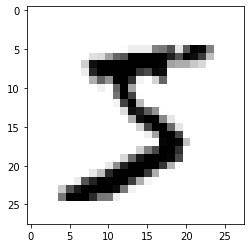

In [10]:
plt.imshow(training_images[0], cmap = plt.cm.binary)
plt.show()

# Normalization to reduce stress on computation

In [11]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [12]:
print(training_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

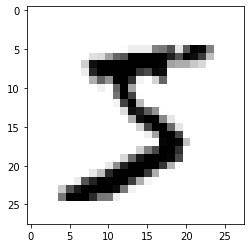

In [13]:
plt.imshow(training_images[0], cmap = plt.cm.binary)
plt.show()

# Define architecture of the model

In [42]:
# Here the architecure of the model is defined

# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), 
#                                     tf.keras.layers.Dense(128, activation='relu'), 
#                                     tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# Build the model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

model = Sequential()
model.add(Conv2D(32,(3,3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

In [44]:
# most go to optimizer is adam, others include stochastic gradient descent
# we gonna calcluate losses using sparse categorica _crossentropy if it were two classes maybe binary categorical crossentropy
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Training

In [45]:
# model.fit(training_images, training_labels, epochs=5)
history = model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 45s 23ms/step - loss: 0.1775 - accuracy: 0.9460
Epoch 2/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0639 - accuracy: 0.9798
Epoch 3/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0472 - accuracy: 0.9851
Epoch 4/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0391 - accuracy: 0.9880
Epoch 5/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0333 - accuracy: 0.9897


In [46]:
history.history

{'loss': [0.1775268018245697,
  0.06388064473867416,
  0.04721212014555931,
  0.03906507045030594,
  0.0332857109606266],
 'accuracy': [0.9460333585739136,
  0.9797666668891907,
  0.9850999712944031,
  0.9879500269889832,
  0.9896666407585144]}

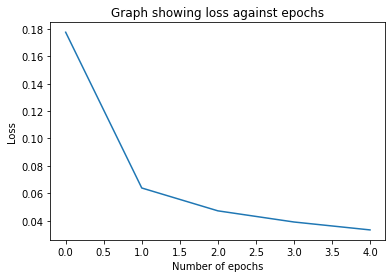

In [61]:
plt.plot(history.history['loss'] )
plt.title('Graph showing loss against epochs')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.show()

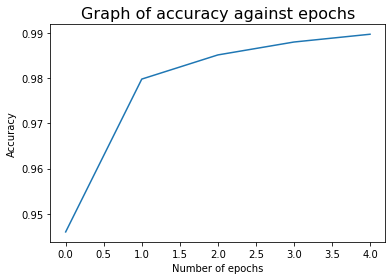

In [48]:
plt.plot(history.history['accuracy'] )
plt.title('Graph of accuracy against epochs', fontdict={'fontsize':16})
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.show()

# Model evaluation

In [49]:

print(model.evaluate(test_images,test_labels))

313/313 [==============================] - 2s 7ms/step - loss: 0.0291 - accuracy: 0.9910
[0.029147295281291008, 0.9909999966621399]


In [50]:
psix = model.predict(test_images[339].reshape(-1,28,28))
test_labels[339], psix.argmax(axis=1), psix.max(axis=1)

(6, array([6], dtype=int64), array([0.9774419], dtype=float32))

In [51]:
six_imgs, six_labels = [], []

counter = 0

for i in range(test_images.shape[0]):
    if test_labels[i] == 6:
        six_imgs.append(test_images[i])
        six_labels.append(test_labels[i])
        counter +=1
    if counter ==10:
        break;

len(six_imgs), len(six_labels)

(10, 10)

In [52]:
four_imgs, four_labels = [], []

counter = 0

for i in range(test_images.shape[0]):
    if test_labels[i] == 4:
        print(i)
        four_imgs.append(test_images[i])
        four_labels.append(test_labels[i])
        counter +=1
    if counter ==10:
        break;

len(four_imgs), len(four_labels)

4
6
19
24
27
33
42
48
49
56


(10, 10)

In [53]:
nine_imgs, nine_labels = [], []

counter = 0

for i in range(test_images.shape[0]):
    if test_labels[i] == 9:
        print(i)
        nine_imgs.append(test_images[i])
        nine_labels.append(test_labels[i])
        counter +=1
    if counter ==10:
        break;

len(nine_imgs), len(nine_labels)

7
9
12
16
20
58
62
73
78
92


(10, 10)

In [54]:
psix[0][8]
print(psix[0])

[1.4630485e-09 3.9400382e-11 5.5790554e-07 3.3035645e-09 2.4425592e-08
 2.2444766e-02 9.7744191e-01 3.7039398e-13 1.1272765e-04 3.0926556e-10]


<BarContainer object of 10 artists>

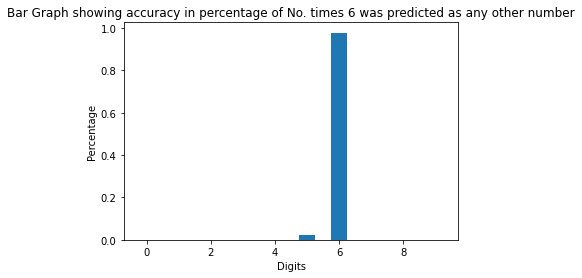

In [55]:
# help(plt.bar)
plt.title("Bar Graph showing accuracy in percentage of No. times 6 was predicted as any other number")
plt.ylabel('Percentage')
plt.xlabel('Digits')

plt.bar([i for i in range(0, len(psix[0]))],psix[0], width=0.5) 

In [28]:
#predicting digit 9
pnine = model.predict(test_images[7].reshape(-1,28,28))
test_labels[7], pnine.argmax(axis=1), pnine.max(axis=1)

(9, array([9], dtype=int64), array([0.98872524], dtype=float32))

<BarContainer object of 10 artists>

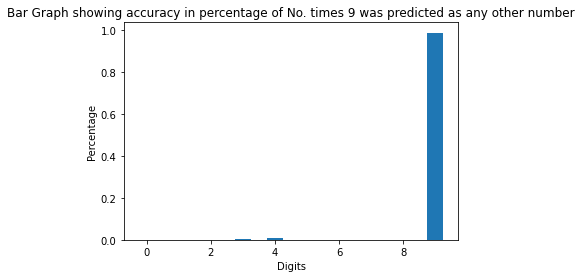

In [56]:
plt.title("Bar Graph showing accuracy in percentage of No. times 9 was predicted as any other number")
plt.ylabel('Percentage')
plt.xlabel('Digits')

plt.bar([i for i in range(0, len(pnine[0]))],pnine[0], width=0.5) 

In [30]:
pfour = model.predict(test_images[4].reshape(-1,28,28))
test_labels[4], pfour.argmax(axis=1), pfour.max(axis=1)

(4, array([4], dtype=int64), array([0.9649163], dtype=float32))

<BarContainer object of 10 artists>

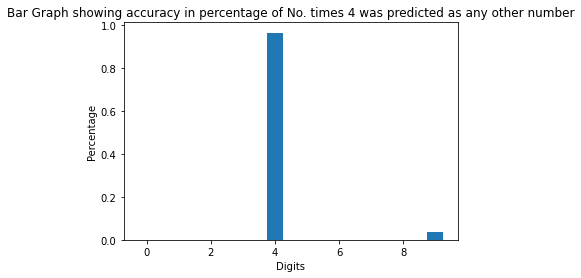

In [57]:
plt.title("Bar Graph showing accuracy in percentage of No. times 4 was predicted as any other number")
plt.ylabel('Percentage')
plt.xlabel('Digits')

plt.bar([i for i in range(0, len(pfour[0]))],pfour[0], width=0.5) 

In [34]:
import seaborn as sns
from sklearn.metrics import confusion_matrix , accuracy_score , recall_score ,precision_score

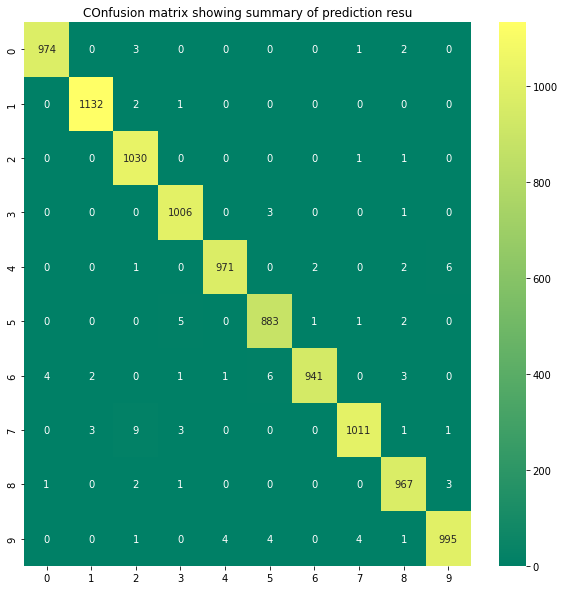

In [58]:
arr = confusion_matrix(test_labels , np.argmax(model.predict(test_images) , axis =1))

plt.figure(figsize=(10 , 10))
sns.heatmap(arr ,
            cmap = 'summer',
            fmt ='g',
            annot=True 
            )
plt.title("COnfusion matrix showing summary of prediction resu")
plt.show()

In [62]:
model.save('mnist_grp1.model')

INFO:tensorflow:Assets written to: mnist_grp1.model\assets


In [63]:
saved_model = tf.keras.models.load_model('mnist_grp1.model')